In [2]:
import wget
url= 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip'
wget.download(url)

100% [........................................................................] 11480187 / 11480187

'validation-horse-or-human.zip'

In [4]:
import os
import zipfile

local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()

In [3]:
import os
import zipfile

local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')
zip_ref.close()

In [5]:
train_horse_dir = os.path.join('horse-or-human/horses')
train_human_dir = os.path.join('horse-or-human/humans')
train_horse_dir = os.path.join('validation-horse-or-human/horses')
train_human_dir = os.path.join('validation-horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 128
total training human images: 128


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

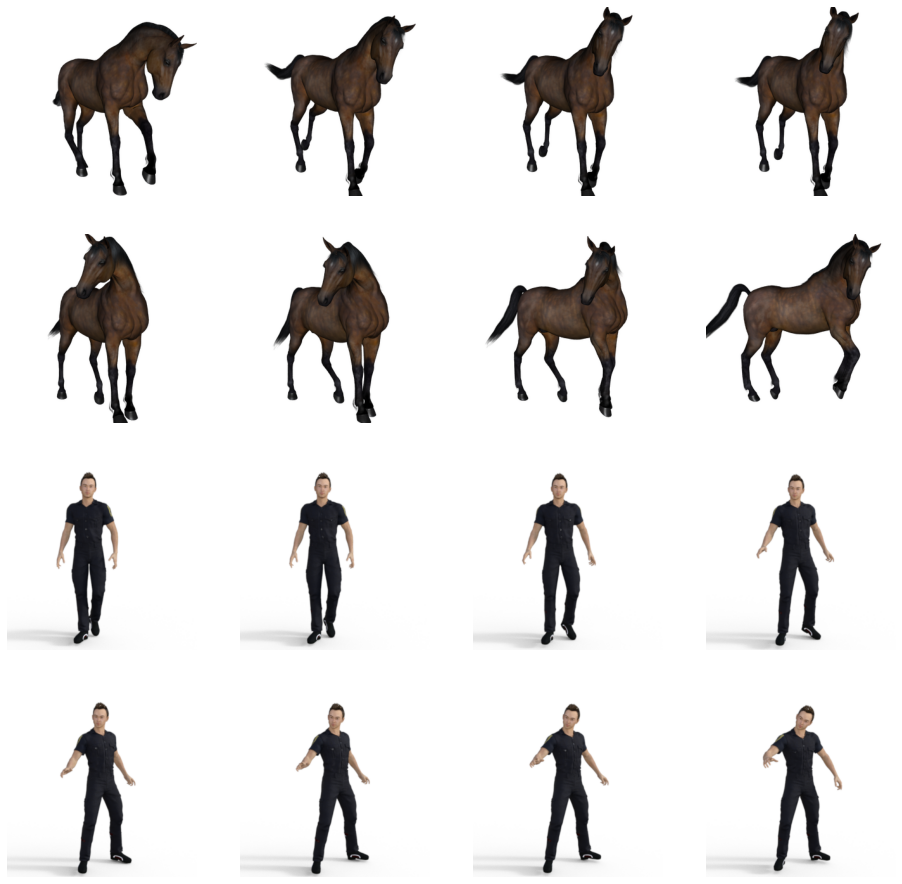

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf
import cv2
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [11]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('horse-or-human', target_size=(300, 300), batch_size=128, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory('validation-horse-or-human', target_size=(300, 300), batch_size=32, class_mode='binary')

       

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=2)

Epoch 1/20
9/9 - 6s - loss: 0.9409 - accuracy: 0.5180 - val_loss: 1.6376 - val_accuracy: 0.5000
Epoch 2/20
9/9 - 6s - loss: 0.6945 - accuracy: 0.7760 - val_loss: 0.7662 - val_accuracy: 0.6680
Epoch 3/20
9/9 - 6s - loss: 0.4345 - accuracy: 0.8257 - val_loss: 0.8988 - val_accuracy: 0.6445
Epoch 4/20
9/9 - 6s - loss: 0.5153 - accuracy: 0.8228 - val_loss: 0.5813 - val_accuracy: 0.8242
Epoch 5/20
9/9 - 6s - loss: 0.2974 - accuracy: 0.8734 - val_loss: 0.3935 - val_accuracy: 0.8789
Epoch 6/20
9/9 - 6s - loss: 0.3184 - accuracy: 0.8685 - val_loss: 0.5278 - val_accuracy: 0.8516
Epoch 7/20
9/9 - 6s - loss: 0.2170 - accuracy: 0.9153 - val_loss: 1.3403 - val_accuracy: 0.8125
Epoch 8/20
9/9 - 6s - loss: 0.2254 - accuracy: 0.9114 - val_loss: 0.4050 - val_accuracy: 0.8789
Epoch 9/20
9/9 - 6s - loss: 0.1167 - accuracy: 0.9533 - val_loss: 2.2268 - val_accuracy: 0.7656
Epoch 10/20
9/9 - 6s - loss: 0.0430 - accuracy: 0.9873 - val_loss: 14.8423 - val_accuracy: 0.5000
Epoch 11/20
9/9 - 6s - loss: 1.8478 - 

In [18]:
#img = cv2.imread('person3.jpg')
#reshape_img = cv2.resize(img, (300,300)) 
#temp = np.array(reshape_img)
#array_image = temp.reshape(1,300,300,-1)

In [19]:
#prediction = model.predict([array_image])
#print(prediction)
#if prediction>0.5:
#    print("It is a human")
#else:
#    print("It is a horse")

Text(0.5, 1.0, 'Training and validation loss')

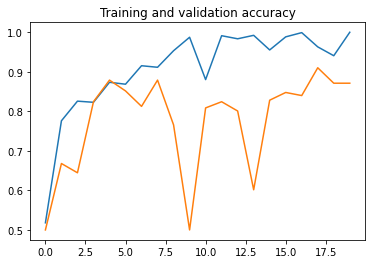

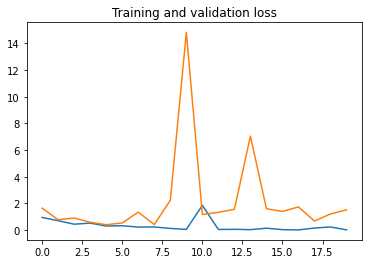

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and validation loss')